In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()
today = date.today()
today

datetime.date(2023, 5, 31)

In [2]:
sql = "SELECT C.id, C.name AS item, G.name AS kind, G.id FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,id,item,kind,id
0,1,Books & Software,Edutainment,3
1,2,CCF,Luxury,5
2,3,Cigarette,Luxury,5
3,4,Food,Food,4
4,5,Fuel,Transportation,10


In [3]:
# create a date object
date = pd.to_datetime('2023-05-31')

# find the beginning of the month for the given date
bom = date.to_period('M').start_time
eom = date.to_period('M').end_time
bom = bom.date()
eom = eom.date()
print(f'Month start: {bom}')
print(f'Month end: {eom}')

Month start: 2023-05-01
Month end: 2023-05-31


In [4]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)

df = pd.read_sql(sql, conn)
df


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2023-05-31" 
ORDER BY amount DESC



,date,amount,item,kind
0,2023-05-31,10000,Parent,Parent
1,2023-05-31,1050,MidJourney,Edutainment
2,2023-05-31,690,ChatGPT,Edutainment
3,2023-05-31,640,Internet Home,Communication
4,2023-05-31,500,Telephone Dtac,Communication
5,2023-05-31,420,Netflix,Edutainment
6,2023-05-31,170,Google,Edutainment
7,2023-05-31,140,Apple,Edutainment
8,2023-05-31,100,Apple,Edutainment
9,2023-05-31,40,Apple,Edutainment


In [5]:
df.amount.sum()

13750

In [6]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)

df_eom = pd.read_sql(sql, conn)
df_eom


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2023-05-31" 
ORDER BY amount DESC



,date,amount,item,kind
0,2023-05-31,10000,Parent,Parent
1,2023-05-31,1050,MidJourney,Edutainment
2,2023-05-31,690,ChatGPT,Edutainment
3,2023-05-31,640,Internet Home,Communication
4,2023-05-31,500,Telephone Dtac,Communication
5,2023-05-31,420,Netflix,Edutainment
6,2023-05-31,170,Google,Edutainment
7,2023-05-31,140,Apple,Edutainment
8,2023-05-31,100,Apple,Edutainment
9,2023-05-31,40,Apple,Edutainment


In [7]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)

df_t = pd.read_sql(sql, conn)
df_t.head()


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2023-05-01" AND "2023-05-31" 
ORDER BY date



,date,amount,item,kind
0,2023-05-02,90,Food,Food
1,2023-05-02,3200,Pets,Pets
2,2023-05-04,380,Transportation,Transportation
3,2023-05-05,610,Food,Food
4,2023-05-06,2480,Pets,Pets


In [8]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple               280
ChatGPT             690
Food               2090
Fuel               1320
Google              170
Internet Home       640
Medicine           8440
MidJourney         1050
Mother            90790
Netflix             420
Parent            10000
Personal Care       250
Pets              15010
Telephone Dtac      500
Transportation      380
True Visions      22800
Name: amount, dtype: int64

In [9]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Apparel              250
Communication      23940
Edutainment         2610
Food                2090
Medicine            8440
Parent            100790
Pets               15010
Transportation      1700
Name: amount, dtype: int64

In [10]:
expense = grouped.amount.sum()
sum(expense)

154830

<Figure size 864x864 with 0 Axes>

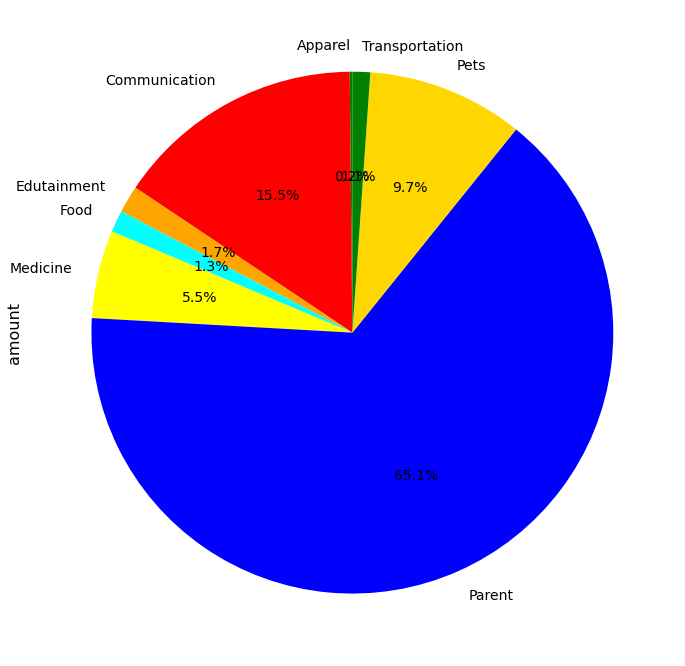

In [11]:
fig_path = "../fig/Expense-2305.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [12]:
expense.to_csv("../data/expense-2305.csv")

In [13]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2023-05-31" 
ORDER BY date



In [14]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [15]:
df_tmp.to_csv("../data/expense-eom.csv")